In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,adfuller,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt

## Data Preparation and Exploration

In [3]:
df=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\exchange_rate.csv",index_col='date',parse_dates=True)

In [4]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [9]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [11]:
df.tail()

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [13]:
df.size

7588

In [15]:
df.shape

(7588, 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [19]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [21]:
df.isnull().sum()

Ex_rate    0
dtype: int64

In [23]:
df.duplicated()

date
01-01-1990 00:00    False
02-01-1990 00:00    False
03-01-1990 00:00    False
04-01-1990 00:00    False
05-01-1990 00:00    False
                    ...  
06-10-2010 00:00     True
07-10-2010 00:00     True
08-10-2010 00:00    False
09-10-2010 00:00    False
10-10-2010 00:00     True
Length: 7588, dtype: bool

In [25]:
df[df.duplicated()]

,Ex_rate
date,
30-01-1990 00:00,0.752100
08-02-1990 00:00,0.760500
10-02-1990 00:00,0.763500
14-02-1990 00:00,0.759600
16-02-1990 00:00,0.760700
...,...
03-10-2010 00:00,0.719114
05-10-2010 00:00,0.718701
06-10-2010 00:00,0.718494


<Axes: xlabel='date'>

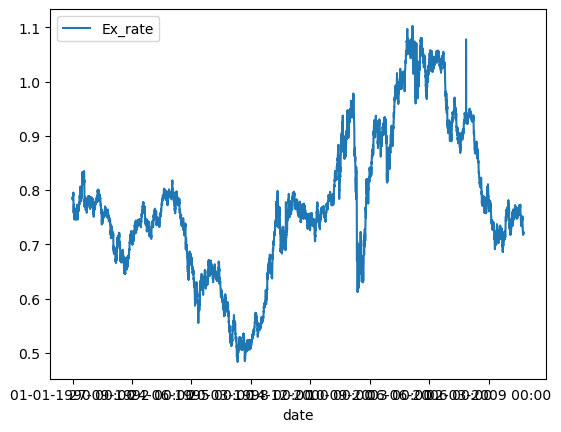

In [27]:
df.plot()

In [44]:
result=seasonal_decompose(df['Ex_rate'],model='multiplicative',period=12)

<Axes: xlabel='date'>

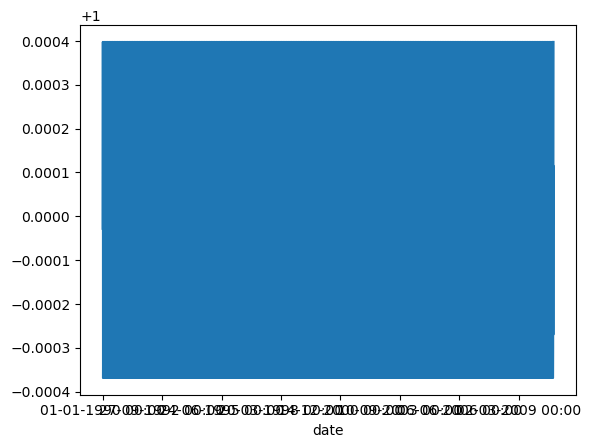

In [46]:
result.seasonal.plot()

<Axes: xlabel='date'>

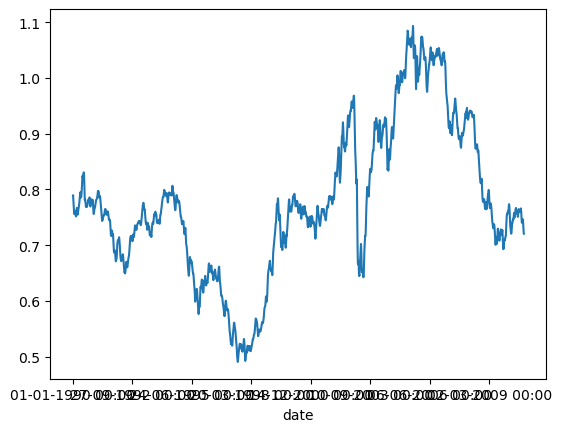

In [48]:
result.trend.plot()

<Axes: xlabel='date'>

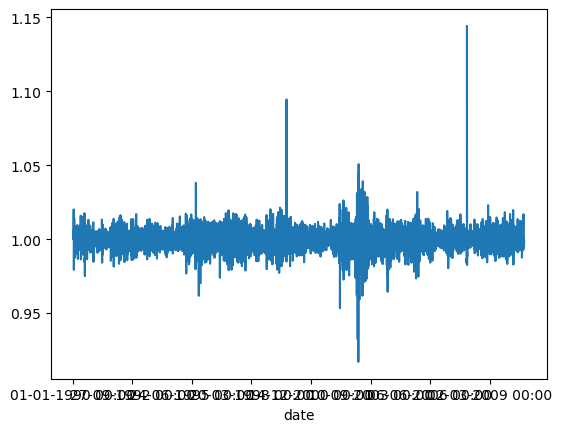

In [50]:
result.resid.plot()

In [54]:
df['z_score'] = (df['Ex_rate'] - df['Ex_rate'].mean()) / df['Ex_rate'].std()

In [56]:
anomalies = df[abs(df['z_score']) > 3]  

In [58]:
anomalies

,Ex_rate,z_score
date,,


##  Model Building - ARIMA

In [66]:
from statsmodels.tsa.stattools import acf,adfuller,pacf
from statsmodels.tsa.arima_model import ARIMA

In [147]:
df_air=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\exchange_rate.csv",index_col='date',parse_dates=True)
df_air

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [89]:
df.dtypes

Ex_rate    float64
dtype: object

In [119]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


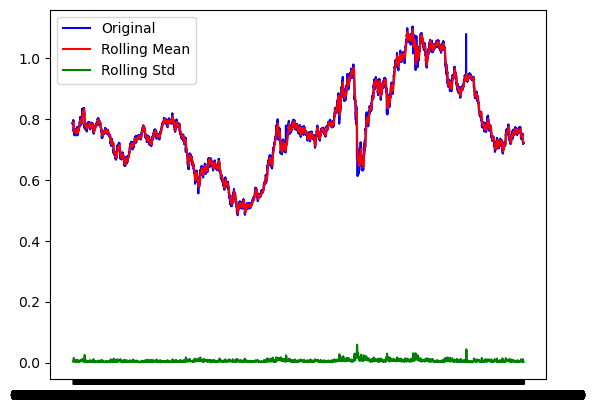

In [149]:
test_stationarity(df_air['Ex_rate'])

##Differencing

In [150]:
df_air['Difference']=df_air['Ex_rate']-df_air['Ex_rate'].shift(12)

In [151]:
df_air

,Ex_rate,Difference
date,,
01-01-1990 00:00,0.785500,NaN
02-01-1990 00:00,0.781800,NaN
03-01-1990 00:00,0.786700,NaN
04-01-1990 00:00,0.786000,NaN
05-01-1990 00:00,0.784900,NaN
...,...,...
06-10-2010 00:00,0.718494,-0.012073
07-10-2010 00:00,0.721839,-0.007875
08-10-2010 00:00,0.723197,-0.006517


In [155]:
df_air.dropna(inplace=True)

In [157]:
df_air

,Ex_rate,Difference
date,,
13-01-1990 00:00,0.793500,0.008000
14-01-1990 00:00,0.795400,0.013600
15-01-1990 00:00,0.775100,-0.011600
16-01-1990 00:00,0.762200,-0.023800
17-01-1990 00:00,0.758300,-0.026600
...,...,...
06-10-2010 00:00,0.718494,-0.012073
07-10-2010 00:00,0.721839,-0.007875
08-10-2010 00:00,0.723197,-0.006517


Results of Dickey-Fuller Test :

Test Statistic                -1.056518e+01
p-value                        7.549185e-19
#Lags Used                     3.600000e+01
Number of Observations Used    7.539000e+03
Critical Value (1%)           -3.431218e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


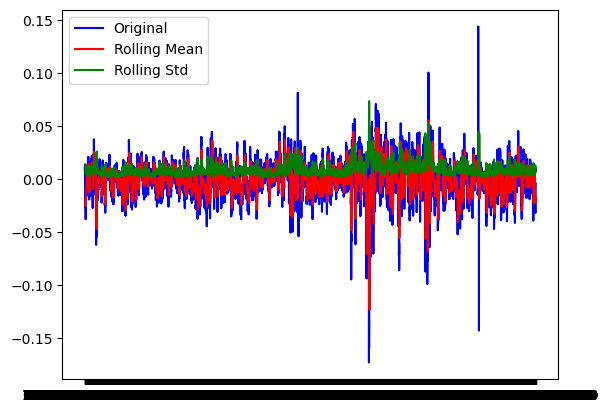

In [159]:
test_stationarity(df_air['Difference'])

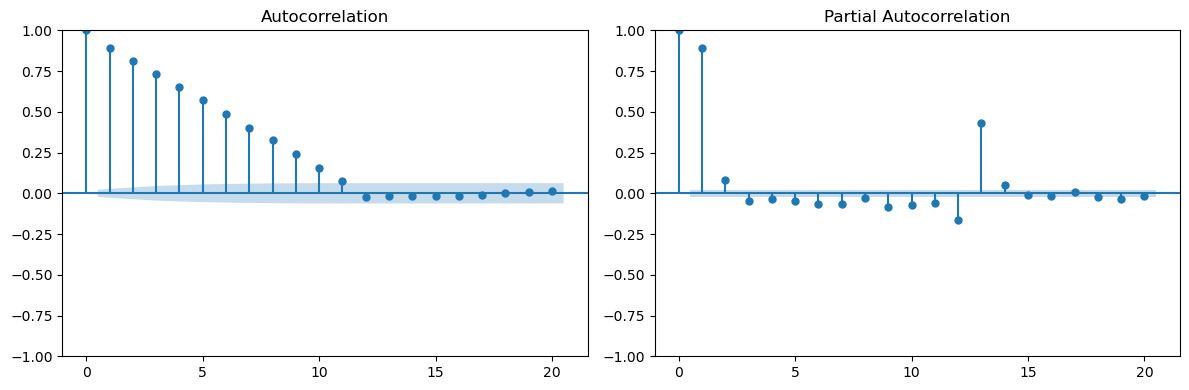

In [167]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df_air['Difference'], lags=20, ax=axes[0])
smt.graphics.plot_pacf(df_air['Difference'], lags=20, ax=axes[1])
plt.tight_layout()

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [229]:
model = ARIMA(df_air['Ex_rate'], order=(2,1,10))

In [231]:
result=model.fit()

In [371]:
pred=result.predict()

In [373]:
pred

1990-01-13    0.000000
1990-01-14    0.793500
1990-01-15    0.795148
1990-01-16    0.777792
1990-01-17    0.763948
                ...   
2010-10-06    0.718787
2010-10-07    0.718598
2010-10-08    0.721402
2010-10-09    0.722933
2010-10-10    0.721144
Freq: D, Name: predicted_mean, Length: 7576, dtype: float64

In [400]:
prediction=result.forecast(20)

In [404]:
prediction

2010-10-11    0.720786
2010-10-12    0.720892
2010-10-13    0.720887
2010-10-14    0.720794
2010-10-15    0.720863
2010-10-16    0.720903
2010-10-17    0.720819
2010-10-18    0.720852
2010-10-19    0.720858
2010-10-20    0.720848
2010-10-21    0.720854
2010-10-22    0.720852
2010-10-23    0.720852
2010-10-24    0.720853
2010-10-25    0.720852
2010-10-26    0.720852
2010-10-27    0.720852
2010-10-28    0.720852
2010-10-29    0.720852
2010-10-30    0.720852
Freq: D, Name: predicted_mean, dtype: float64

In [238]:
df_air['forecast']=result.predict()

In [261]:
df_air

,Ex_rate,Difference,forecast
date,,,
13-01-1990 00:00,0.793500,0.008000,0.000000
14-01-1990 00:00,0.795400,0.013600,0.793500
15-01-1990 00:00,0.775100,-0.011600,0.795148
16-01-1990 00:00,0.762200,-0.023800,0.777792
17-01-1990 00:00,0.758300,-0.026600,0.763948
...,...,...,...
06-10-2010 00:00,0.718494,-0.012073,0.751657
07-10-2010 00:00,0.721839,-0.007875,0.764370
08-10-2010 00:00,0.723197,-0.006517,0.759939


<Axes: xlabel='date'>

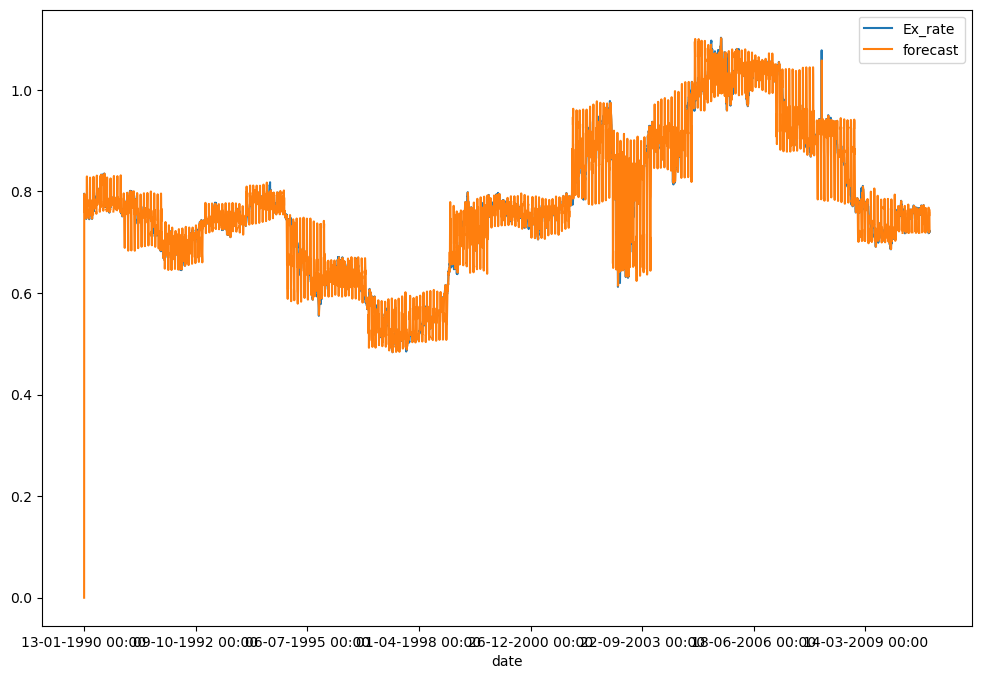

In [263]:
df_air[['Ex_rate','forecast']].plot(figsize=(12,8))

## Evaluation and Comparison

##	Compute Error Metrics

##Mean Absolute Error

In [394]:
from sklearn.metrics import mean_absolute_error

In [412]:
mae=mean_absolute_error(df_air['Ex_rate'],pred)

In [398]:
mae

0.0038022850281037406

##Mean Squared Error

In [387]:
from sklearn.metrics import mean_squared_error

In [410]:
mse = mean_squared_error(df_air['Ex_rate'],pred)

In [391]:
mse

0.00011905067387266299

##RMSE

In [418]:
rmse=np.sqrt( mean_squared_error(df_air['Ex_rate'],pred))

In [420]:
rmse

0.010911034500571565

## Model Building - Exponential Smoothing

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [49]:
df_exp=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\exchange_rate.csv",index_col='date',parse_dates=True)
df_exp

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [51]:
span=12
alpha=12/(12+1)

##Simple Exponential Smoothing

In [54]:
df_exp['SES']=SimpleExpSmoothing(df_exp['Ex_rate']).fit(smoothing_level=alpha).fittedvalues

In [56]:
df_exp

,Ex_rate,SES
date,,
01-01-1990 00:00,0.785500,0.785500
02-01-1990 00:00,0.781800,0.785500
03-01-1990 00:00,0.786700,0.782085
04-01-1990 00:00,0.786000,0.786345
05-01-1990 00:00,0.784900,0.786027
...,...,...
06-10-2010 00:00,0.718494,0.718777
07-10-2010 00:00,0.721839,0.718516
08-10-2010 00:00,0.723197,0.721583


<Axes: xlabel='date'>

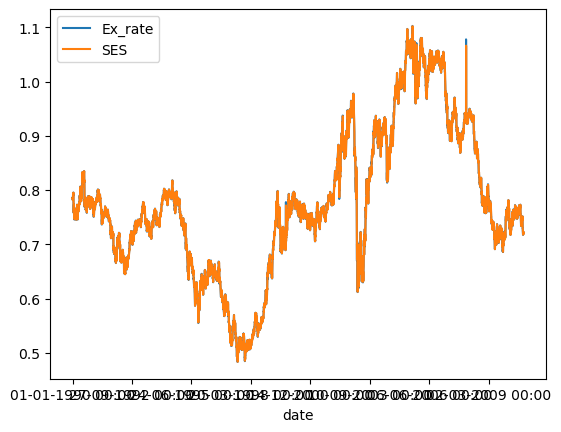

In [58]:
df_exp[['Ex_rate','SES']].plot()

##Double Exponential Smoothing

In [61]:
df_exp['DES']=ExponentialSmoothing(df_exp['Ex_rate'],trend='multiplicative').fit(smoothing_level=0.5,smoothing_trend=0.5).fittedvalues

In [63]:
df_exp

,Ex_rate,SES,DES
date,,,
01-01-1990 00:00,0.785500,0.785500,0.783648
02-01-1990 00:00,0.781800,0.785500,0.785263
03-01-1990 00:00,0.786700,0.782085,0.783356
04-01-1990 00:00,0.786000,0.786345,0.785689
05-01-1990 00:00,0.784900,0.786027,0.786584
...,...,...,...
06-10-2010 00:00,0.718494,0.718777,0.718488
07-10-2010 00:00,0.721839,0.718516,0.718487
08-10-2010 00:00,0.723197,0.721583,0.720999


<Axes: xlabel='date'>

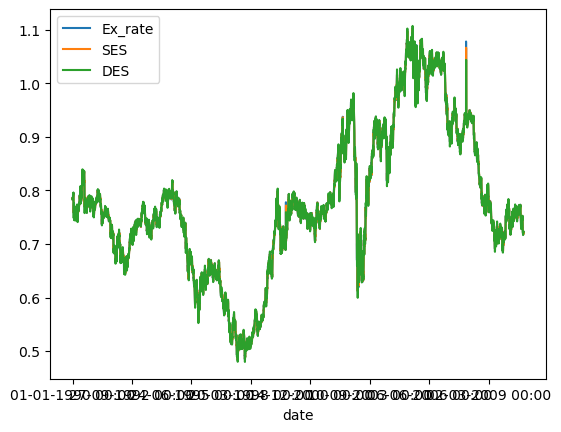

In [65]:
df_exp[['Ex_rate','SES','DES']].plot()

##Triple Exponential Smoothing

In [68]:
df_exp['TES']=ExponentialSmoothing(df_exp['Ex_rate'],trend='additive',seasonal_periods=12).fit(smoothing_level=0.5,smoothing_trend=0.5).fittedvalues

In [70]:
df_exp

,Ex_rate,SES,DES,TES
date,,,,
01-01-1990 00:00,0.785500,0.785500,0.783648,0.783643
02-01-1990 00:00,0.781800,0.785500,0.785263,0.785266
03-01-1990 00:00,0.786700,0.782085,0.783356,0.783360
04-01-1990 00:00,0.786000,0.786345,0.785689,0.785693
05-01-1990 00:00,0.784900,0.786027,0.786584,0.786586
...,...,...,...,...
06-10-2010 00:00,0.718494,0.718777,0.718488,0.718491
07-10-2010 00:00,0.721839,0.718516,0.718487,0.718489
08-10-2010 00:00,0.723197,0.721583,0.720999,0.720998


<Axes: xlabel='date'>

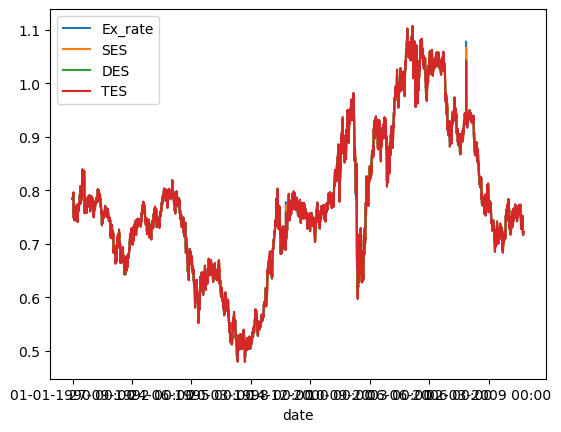

In [72]:
df_exp[['Ex_rate','SES','DES','TES']].plot()

##Forecast Values

In [75]:
fitted_model=ExponentialSmoothing(df_exp['Ex_rate'],trend='Multiplicative',seasonal='Multiplicative',seasonal_periods=12).fit()

In [76]:
fitted_model

In [77]:
test_prediction=fitted_model.forecast(40)

In [78]:
test_prediction

7588    0.720880
7589    0.720655
7590    0.720340
7591    0.720593
7592    0.720496
7593    0.720483
7594    0.720562
7595    0.720297
7596    0.720484
7597    0.720471
7598    0.720388
7599    0.720620
7600    0.720609
7601    0.720384
7602    0.720070
7603    0.720323
7604    0.720226
7605    0.720213
7606    0.720292
7607    0.720027
7608    0.720214
7609    0.720200
7610    0.720118
7611    0.720350
7612    0.720339
7613    0.720114
7614    0.719800
7615    0.720053
7616    0.719956
7617    0.719943
7618    0.720021
7619    0.719757
7620    0.719944
7621    0.719930
7622    0.719848
7623    0.720080
7624    0.720069
7625    0.719844
7626    0.719530
7627    0.719783
dtype: float64

In [79]:
test_prediction[:10]

7588    0.720880
7589    0.720655
7590    0.720340
7591    0.720593
7592    0.720496
7593    0.720483
7594    0.720562
7595    0.720297
7596    0.720484
7597    0.720471
dtype: float64

## Evaluation and Comparison

In [ ]:
mae=mean_absolute_error(df_air['Ex_rate'],pred)

## 	Model Comparison

## 2.Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

## Exponential Smoothing

Performance

1.Observed Results: Exponential smoothing typically performs well with time series data that exhibits trends and seasonality, especially when parameters are tuned appropriately.

2.Error Metrics: Lower MAE and MSE values indicate better performance. If results show low error metrics, it suggests that the model captures the underlying patterns effectively.

Advantages

1.Simplicity: Exponential smoothing is straightforward to implement and understand, making it accessible for practitioners.

2.Adaptability: The model can be adjusted for different levels of smoothing, allowing it to respond quickly to changes in the data.

3.Limited Data Requirements: It performs well with smaller datasets, which can be a limitation for more complex models that require larger amounts of data for training.
                                                                                                                                                        
Limitations
                                                                                                                                                        
1.Assumes Linearity: Exponential smoothing primarily works well for linear trends and may struggle with non-linear relationships.

2.Sensitive to Outliers: Extreme values in the data can disproportionately affect forecasts, leading to less reliable predictions.

3.No Explanatory Variables: The model does not incorporate external factors, limiting its applicability in more complex scenarios where external influences are significant.


## ARIMA

ARIMA (AutoRegressive Integrated Moving Average)

1.Performance: ARIMA can handle more complex patterns, including seasonality and autocorrelation, making it suitable for a wider range of time series data.
                                                                                                                  
2.Advantages: Provides flexibility in modeling and can include differencing to stabilize the mean.

3.Limitations: Requires more data and is computationally more intensive. Model selection can be complex due to the need for hyperparameter tuning.


## 3. Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset

Findings

Model Performance:

Different models were evaluated based on their ability to forecast exchange rates accurately.
    
Performance was assessed using error metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE).


ARIMA Model gives best Performance